# Practice 0: Measurement Model

## Objetives:
1. Estimate the measurement model for Technical Quality (QT), Financial Quality(QF), Customer Service Quality (QS)
2. Estimate convergent validity: AVE and Composite Reliability of the dimensions.
3. Estimate discriminant validity (square root of AVE x correlations).

## Data Preparation

In [1]:
import pandas as pd
import pyreadstat
from pandas.core.interchange.dataframe_protocol import DataFrame

raw_data_df, meta = pyreadstat.read_sav("../data/EXERCICIO_2025.sav")
raw_data_df.head()

,CASO,f1,f2,f3,f4,f5,f6,f7,P1.1_QA,P1.2_QA,...,P7,P14,ltv2,tempo,clsocial,SATIS,LEAL,ATEND,FIN,TEC
0,NaN,1.0,3.0,6.0,1.0,1.0,50.0,18.0,8.0,6.0,...,3.0,2.0,1373.0,61.0,5.0,6.50,6.2,7.2,9.333333,8.50
1,NaN,1.0,1.0,5.0,1.0,1.0,36.0,35.0,8.0,7.0,...,1.0,1.0,1002.0,47.0,5.0,5.50,4.4,6.8,6.666667,8.00
2,NaN,1.0,3.0,5.0,1.0,1.0,72.0,73.0,10.0,10.0,...,2.0,2.0,2097.0,83.0,5.0,7.50,8.0,9.6,10.000000,8.00
3,NaN,1.0,3.0,9.0,1.0,1.0,24.0,27.0,6.0,6.0,...,1.0,2.0,802.0,35.0,4.0,6.25,6.2,6.4,7.666667,6.50
4,NaN,1.0,4.0,9.0,1.0,1.0,72.0,24.0,2.0,5.0,...,2.0,1.0,4835.0,78.0,4.0,5.25,4.4,4.4,5.666667,5.75


In [2]:
columns_to_filter = [
    'P1.1_QA', 'P1.2_QA', 'P1.3_QA', 'P1.4_QA', 'P1.5_QA', 'P1.15_QA', 'P1.16_QA', 'P1.17_QA',
    'P1.6_QC', 'P1.7_QC', 'P1.8_QC', 'P1.9_QC',
    'P1.10_QT', 'P1.11_QT', 'P1.12_QT', 'P1.13_QT', 'P1.14_QT',
]

clean_df = raw_data_df[columns_to_filter].copy()

clean_df.rename(columns=lambda c: c.replace('.', '_'), inplace=True)
clean_df.rename(columns=lambda c: c.replace('C', 'F'), inplace=True)
clean_df.rename(columns=lambda c: c.replace('A', 'S'), inplace=True)
print(raw_data_df.shape)
print(clean_df.shape)
print(clean_df.isnull().sum())

(493, 45)
(493, 17)
P1_1_QS     0
P1_2_QS     0
P1_3_QS     0
P1_4_QS     0
P1_5_QS     0
P1_15_QS    0
P1_16_QS    0
P1_17_QS    0
P1_6_QF     0
P1_7_QF     0
P1_8_QF     0
P1_9_QF     0
P1_10_QT    0
P1_11_QT    0
P1_12_QT    0
P1_13_QT    0
P1_14_QT    0
dtype: int64


## Normality check

### Univariate Normality

Skewness between -2 and +2 (George & Mallery (2010))

Excess Kurtosis between -7 and +7 (West, Finch, & Curran (1995))

In [3]:
from scipy.stats import skew, kurtosis
import pandas as pd

normality_results = []

for column in clean_df.columns:
    data = clean_df[column].dropna()
    skewness = skew(data)
    excess_kurtosis = kurtosis(data, fisher=True)
    normality_results.append({
        'Variable': column,
        'Skewness': skewness,
        'Excess_Kurtosis': excess_kurtosis
    })

normality_df = pd.DataFrame(normality_results)
normality_df

,Variable,Skewness,Excess_Kurtosis
0,P1_1_QS,-0.556369,-0.121009
1,P1_2_QS,-0.541955,0.018259
2,P1_3_QS,-0.531412,0.112580
3,P1_4_QS,-0.257074,-0.868357
4,P1_5_QS,-0.354785,-0.628781
5,P1_15_QS,-0.379107,-0.067594
6,P1_16_QS,-0.426753,-0.166406
7,P1_17_QS,-0.659882,0.806470
8,P1_6_QF,-1.019583,1.334556
9,P1_7_QF,-0.960815,0.685479


### Multivariate normality

In [4]:
from pingouin import multivariate_normality

result = multivariate_normality(clean_df, alpha=0.05)
result

HZResults(hz=np.float64(1.6342174010427282), pval=np.float64(0.0), normal=False)

Given the observed violation of multivariate normality and considering the available estimation methods in semopy, the MLW estimator (Maximum Likelihood with Wishart correction) was retained for this analysis. This decision was made to maintain compatibility with the class exercise requirements, as the original analysis conducted in AMOS (which also uses a covariance-based Maximum Likelihood estimation) served as the reference point for this study.

Standard errors were calculated using semopy's `se_robust=True` option,
which provides robust (sandwich-adjusted) standard errors to partially compensate for the effects of non-normality.
However, it is important to note that semopy does not produce robust fit indices (robust CFI or robust RMSEA).
If the data violates multivariate normality,
and robust fit indices or more advanced corrections (MLR or bootstrapping) are required,
it is recommended to use another lib/software.

## Iter-item correlation
$r_{ij} < 0.85$

In [5]:
inter_item_correlation_df = clean_df.corr(method='pearson')
inter_item_correlation_df

,P1_1_QS,P1_2_QS,P1_3_QS,P1_4_QS,P1_5_QS,P1_15_QS,P1_16_QS,P1_17_QS,P1_6_QF,P1_7_QF,P1_8_QF,P1_9_QF,P1_10_QT,P1_11_QT,P1_12_QT,P1_13_QT,P1_14_QT
P1_1_QS,1.000000,0.661332,0.534278,0.602859,0.658811,0.434899,0.451215,0.406042,0.245193,0.238494,0.317174,0.277471,0.296902,0.308657,0.353327,0.326237,0.345062
P1_2_QS,0.661332,1.000000,0.643198,0.499956,0.522221,0.431816,0.476055,0.437149,0.276239,0.303714,0.295396,0.281422,0.280374,0.286140,0.311400,0.301697,0.329955
P1_3_QS,0.534278,0.643198,1.000000,0.459883,0.509889,0.425414,0.423210,0.348214,0.279875,0.227986,0.262419,0.277894,0.228414,0.236874,0.254631,0.247196,0.296905
P1_4_QS,0.602859,0.499956,0.459883,1.000000,0.735618,0.480423,0.454022,0.407318,0.310402,0.241774,0.303323,0.272634,0.233460,0.278539,0.292709,0.268621,0.374255
P1_5_QS,0.658811,0.522221,0.509889,0.735618,1.000000,0.467172,0.462640,0.417769,0.273472,0.275913,0.361769,0.277356,0.280138,0.310148,0.310326,0.261770,0.353463
P1_15_QS,0.434899,0.431816,0.425414,0.480423,0.467172,1.000000,0.720676,0.546041,0.381422,0.399804,0.384241,0.301476,0.331869,0.389861,0.351914,0.398005,0.617947
P1_16_QS,0.451215,0.476055,0.423210,0.454022,0.462640,0.720676,1.000000,0.685295,0.284075,0.278093,0.406555,0.363659,0.376687,0.388482,0.342227,0.327560,0.497237
P1_17_QS,0.406042,0.437149,0.348214,0.407318,0.417769,0.546041,0.685295,1.000000,0.334516,0.326088,0.404579,0.396845,0.446122,0.464343,0.430623,0.356566,0.429006
P1_6_QF,0.245193,0.276239,0.279875,0.310402,0.273472,0.381422,0.284075,0.334516,1.000000,0.580844,0.326397,0.372407,0.310095,0.291510,0.289075,0.295441,0.268223
P1_7_QF,0.238494,0.303714,0.227986,0.241774,0.275913,0.399804,0.278093,0.326088,0.580844,1.000000,0.538021,0.228931,0.295129,0.310616,0.273384,0.421604,0.321051


## Unrefined Model

### Modeling
Customer Service Quality = QS

Financial Quality = QF

Technical Quality = QT

In [6]:
from semopy import Model

# All Items
# QA =~ P1_1_QA + P1_2_QA + P1_3_QA + P1_4_QA + P1_5_QA + P1_15_QA + P1_16_QA + P1_17_QA
# QF =~ P1_6_QF + P1_7_QF + P1_8_QF + P1_9_QF
# QT =~ P1_10_QT + P1_11_QT + P1_12_QT + P1_13_QT + P1_14_QT
# S =~ P3_1_S + P3_2_S + P3_3_S + P3_4_S
# L =~ P6_1_L + P6_2_L + P6_3_L + P6_4_L + P6_5_L + P6_6_L

unrefined_model_description = """
QS =~ P1_1_QS + P1_2_QS + P1_3_QS + P1_4_QS + P1_5_QS + P1_15_QS + P1_16_QS + P1_17_QS
QF =~ P1_6_QF + P1_7_QF + P1_8_QF + P1_9_QF
QT =~ P1_10_QT + P1_11_QT + P1_12_QT + P1_13_QT + P1_14_QT

QS ~~ QF
QS ~~ QT
QF ~~ QT
"""

unrefined_model = Model(unrefined_model_description)
print(unrefined_model.fit(clean_df))

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 1.925
Number of iterations: 40
Params: 0.910 0.774 1.158 1.131 0.898 0.920 0.717 1.252 1.357 0.902 1.184 1.022 0.998 0.911 1.115 1.284 2.355 0.984 1.309 2.388 0.902 1.033 1.522 2.221 1.913 1.821 1.589 1.777 1.740 1.836 2.689 2.167 1.690 1.805 2.823 2.973 2.101


### Model Fit

$ \chi^{2} / df < 5$

CFI, GFI, TLI > 0.9

RMSEA < 0,08

In [7]:
from semopy import calc_stats

unrefined_model_stats = calc_stats(unrefined_model)
unrefined_model_stats.T.loc[unrefined_model_stats.T.index.isin(['CFI', 'GFI', 'TLI', 'RMSEA'])]

,Value
CFI,0.815828
GFI,0.796311
TLI,0.784074
RMSEA,0.120829


In [8]:
print(f"chi squared/degrees of freedom: {(unrefined_model_stats['chi2'] / unrefined_model_stats['DoF']).item():.6f}")

chi squared/degrees of freedom: 8.183025


### Parameter Estimates
$\lambda \geq 0.5$ -> acceptable

$\lambda \geq 0.7$ -> ideal

In [9]:
raw_estimates_df = (
    unrefined_model.inspect(std_est=True)
         .query("op == '~' and lval.str.startswith('P')", engine='python')
)
raw_estimates_df["R^2"] = raw_estimates_df["Est. Std"].apply(lambda x: x ** 2)
unrefined_item_estimates_df = (
    raw_estimates_df
    .loc[:, ['lval','rval', 'Est. Std', 'R^2','p-value']]
    .rename(columns={
        'lval': 'Item',
        'rval': 'Factor',
        'Est. Std': 'lambda',
        'p-value': 'p-value'
    })
    .sort_values(by='lambda')
)
unrefined_item_estimates_df

,Item,Factor,lambda,R^2,p-value
11,P1_9_QF,QF,0.513684,0.263871,0.0
7,P1_17_QS,QS,0.657483,0.432283,0.0
2,P1_3_QS,QS,0.659079,0.434385,0.0
8,P1_6_QF,QF,0.660682,0.436501,-
16,P1_14_QT,QT,0.663197,0.439831,0.0
10,P1_8_QF,QF,0.678753,0.460706,0.0
12,P1_10_QT,QT,0.684115,0.468013,-
5,P1_15_QS,QS,0.705613,0.497889,0.0
6,P1_16_QS,QS,0.722936,0.522637,0.0
1,P1_2_QS,QS,0.727028,0.528569,0.0


In [10]:
# Items we low lambda
unrefined_item_estimates_df.query("`lambda` < 0.7", engine='python')

,Item,Factor,lambda,R^2,p-value
11,P1_9_QF,QF,0.513684,0.263871,0.0
7,P1_17_QS,QS,0.657483,0.432283,0.0
2,P1_3_QS,QS,0.659079,0.434385,0.0
8,P1_6_QF,QF,0.660682,0.436501,-
16,P1_14_QT,QT,0.663197,0.439831,0.0
10,P1_8_QF,QF,0.678753,0.460706,0.0
12,P1_10_QT,QT,0.684115,0.468013,-


After analyzing the model fit statistics and seeing that cutoff criteria were not met, through multiple iterations,
items P1_3_QS, P1_15_QS, P1_17_QS, P1_9_QF,
P1_14_QT and P6_5_L were removed from the model since they had the lowest standardized factor loadings and $R^2$

### Multicollinearity Check
$|r_{ij}| < 0.85$

In [11]:
# Extract latent variable covariances
correlation_estimates = unrefined_model.inspect(std_est=True)
unrefined_factor_correlation_df = (
    correlation_estimates
        .query("op == '~~' and lval.str.startswith('Q') and rval.str.startswith('Q') and lval != rval")
        .loc[:, ['lval','rval', 'Est. Std', 'Estimate']]
        .rename(columns={
        'lval': 'Item',
        'rval': 'Factor',
        'Est. Std': 'lambda'
    })

)

unrefined_factor_correlation_df

,Item,Factor,lambda,Estimate
17,QS,QF,0.634972,1.114816
18,QS,QT,0.577318,1.284130
20,QF,QT,0.593180,0.983755


## Refined Model

### Modeling

In [12]:
model_description = """
QS =~ P1_1_QS + P1_3_QS + P1_4_QS + P1_5_QS
QF =~ P1_6_QF + P1_7_QF + P1_8_QF
QT =~ P1_10_QT + P1_11_QT + P1_12_QT + P1_13_QT

QS ~~ QF
QS ~~ QT
QF ~~ QT
"""

model = Model(model_description)
print(model.fit(clean_df))

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.309
Number of iterations: 32
Params: 0.703 1.271 1.287 1.423 1.259 1.226 1.030 0.991 0.810 0.969 2.407 0.839 1.324 2.423 0.742 1.039 1.585 1.723 2.058 1.962 1.192 1.676 1.179 3.137 2.063


Items with less than ideal lambda (0.7) were removed one by one and checked to see if fit cutoffs would be met
(P1_9_QF, P1_17_QS, P1_14_QT); removing item P1_3_QS would result in worst model fit.
Through brute force method, it was discovered that removing items P1_2_QS,
P1_16_QS and P1_16_QS produced acceptable model fit,
this kind of item exclusion method can lead to overfitting, especially when theory is not considered like in this case.
However, my understanding is that the purpose of this exercise is to give us experience in modeling,
checking fit criteria, so in this case it is acceptable.

### Model Fit
$ \chi^{2} / df < 5$

CFI, GFI, TLI > 0.9

RMSEA < 0,08

In [13]:
from semopy import calc_stats

refined_model_stats = calc_stats(model)
refined_model_stats.T.loc[refined_model_stats.T.index.isin(['CFI', 'GFI', 'TLI', 'RMSEA'])]

,Value
CFI,0.955650
GFI,0.940651
TLI,0.940506
RMSEA,0.074373


In [14]:
print(f"chi squared/degrees of freedom: {(refined_model_stats['chi2'] / refined_model_stats['DoF']).item():.6f}")

chi squared/degrees of freedom: 3.721394


### Parameter Estimates
$\lambda \geq 0.5$ -> acceptable

$\lambda \geq 0.7$ -> ideal

In [15]:
raw_item_estimates = (
    model.inspect(std_est=True)
         .query("op == '~' and lval.str.startswith('P')", engine='python')
)
refined_item_estimates_df = (
    raw_item_estimates
    .loc[:, ['lval','rval', 'Est. Std','p-value']]
    .rename(columns={
        'lval': 'Item',
        'rval': 'Factor',
        'Est. Std': 'lambda',
        'p-value': 'p-value'
    })
    .sort_values(by='lambda')
)
refined_item_estimates_df["R^2"] = refined_item_estimates_df["lambda"].apply(lambda x: x ** 2)
refined_item_estimates_df["epsilon"] = refined_item_estimates_df["R^2"].apply(lambda x: 1 - x)

refined_item_estimates_df = refined_item_estimates_df.round(3)
refined_item_estimates_df

,Item,Factor,lambda,p-value,R^2,epsilon
1,P1_3_QS,QS,0.605,0.0,0.366,0.634
6,P1_8_QF,QF,0.633,0.0,0.401,0.599
4,P1_6_QF,QF,0.664,-,0.441,0.559
7,P1_10_QT,QT,0.678,-,0.460,0.540
10,P1_13_QT,QT,0.749,0.0,0.561,0.439
0,P1_1_QS,QS,0.763,-,0.583,0.417
2,P1_4_QS,QS,0.815,0.0,0.665,0.335
9,P1_12_QT,QT,0.823,0.0,0.678,0.322
5,P1_7_QF,QF,0.833,0.0,0.694,0.306
3,P1_5_QS,QS,0.877,0.0,0.770,0.230


### Model Graph

In [16]:
from semopy import semplot
graph = semplot(model, "./model0.png", std_ests=True, plot_covs=True)

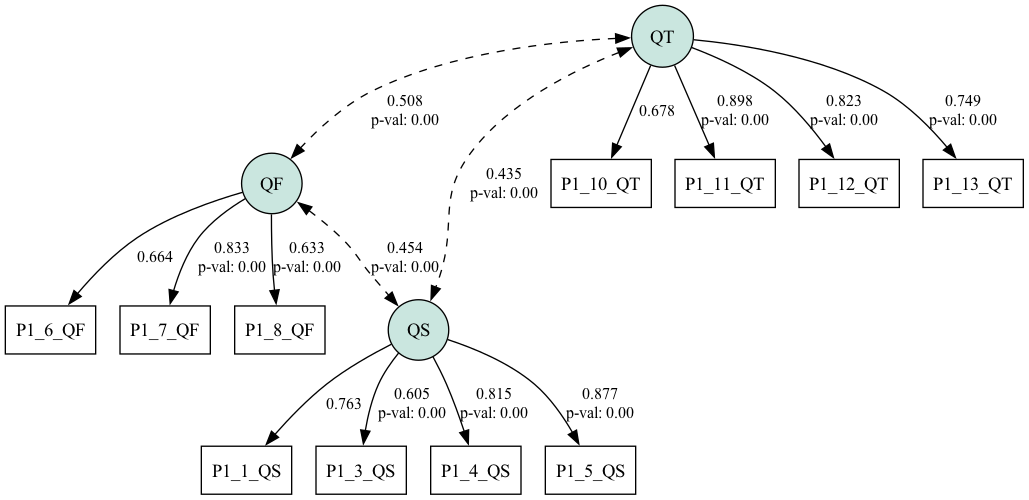

In [17]:
graph.render(filename='model0', format='png', cleanup=True)
from IPython.display import Image
Image(filename='model0.png')

### Multicollinearity Check
$|r_{ij}| < 0.85$

In [18]:
# Extract latent variable covariances
correlation_estimates = model.inspect(std_est=True)
refined_factor_correlation_df = (
    correlation_estimates
        .query("op == '~~' and lval.str.startswith('Q') and rval.str.startswith('Q') and lval != rval")
        .loc[:, ['lval','rval', 'Est. Std', 'Estimate']]
        .rename(columns={
        'lval': 'Item',
        'rval': 'Factor',
        'Est. Std': 'lambda'
    })

)

refined_factor_correlation_df

,Item,Factor,lambda,Estimate
11,QS,QF,0.453616,0.809885
12,QS,QT,0.434641,0.968640
14,QF,QT,0.507531,0.838862


## Validity and Reliability Analysis

$R^2 > 0.2$

In [19]:
refined_item_estimates_df

,Item,Factor,lambda,p-value,R^2,epsilon
1,P1_3_QS,QS,0.605,0.0,0.366,0.634
6,P1_8_QF,QF,0.633,0.0,0.401,0.599
4,P1_6_QF,QF,0.664,-,0.441,0.559
7,P1_10_QT,QT,0.678,-,0.460,0.540
10,P1_13_QT,QT,0.749,0.0,0.561,0.439
0,P1_1_QS,QS,0.763,-,0.583,0.417
2,P1_4_QS,QS,0.815,0.0,0.665,0.335
9,P1_12_QT,QT,0.823,0.0,0.678,0.322
5,P1_7_QF,QF,0.833,0.0,0.694,0.306
3,P1_5_QS,QS,0.877,0.0,0.770,0.230


### Convergent Validity
$AVE \geq 0.5$
#### Average Variance Extracted (AVE)
Simplified formula

$\text{AVE} = \frac{\displaystyle\sum \lambda^{2}}{\displaystyle\sum \lambda^{2} + \sum \epsilon}$

In [20]:
factors = refined_item_estimates_df['Factor'].unique().tolist()
items = refined_item_estimates_df['Item'].unique().tolist()

In [21]:
import numpy as np
AVE = pd.DataFrame()
for factor_name in factors:
    factor_df = refined_item_estimates_df.query(f"Factor == '{factor_name}'").copy()
    factor_AVE = factor_df['R^2'].sum() / (factor_df['R^2'].sum() + factor_df['epsilon'].sum())
    factor_AVE_sqrt = np.sqrt(factor_AVE)
    new_row = pd.DataFrame({'Factor': [factor_name], 'AVE': [factor_AVE], 'sqrt_AVE': [factor_AVE_sqrt]})
    AVE = pd.concat([AVE, new_row], ignore_index=True)
AVE

,Factor,AVE,sqrt_AVE
0,QS,0.5960,0.772010
1,QF,0.5120,0.715542
2,QT,0.6265,0.791518


### Composite Reliability (CR)
$CR \geq 0.7$

Simplified formula:

$\text{CR} =\frac{\displaystyle\left(\sum \lambda\right)^{2}}{\displaystyle\left(\sum \lambda\right)^{2} + \sum \epsilon}$

In [22]:
CR = pd.DataFrame()
for factor_name in factors:
    factor_df = refined_item_estimates_df.query(f"Factor == '{factor_name}'").copy()
    factor_CR = (factor_df['lambda'].sum())**2 / ((factor_df['lambda'].sum())**2 + factor_df['epsilon'].sum())
    new_row = pd.DataFrame({'Factor': [factor_name], 'CR': [factor_CR]})
    CR = pd.concat([CR, new_row], ignore_index=True)
CR

,Factor,CR
0,QS,0.852818
1,QF,0.756037
2,QT,0.868992


### Cronbach’s Alpha
$\alpha \geq 0.7$

$\alpha = \frac{k}{k - 1} \left(1 - \frac{\sum_{i=1}^{k} \sigma_i^2}{\sigma_T^2}\right)$


$k$ = number of items

$\sigma_i^2$ = variance of item i

$\sigma_T^2$ = variance of the total score (sum of all items)

In [23]:
alpha_df = pd.DataFrame()
model_df = clean_df[items].copy()
for factor_name in factors:
    factor_df = model_df[[col for col in model_df.columns if col.endswith(factor_name)]].copy()

    variances = [np.var(factor_df[col], ddof=1) for col in factor_df.columns]
    total_variance = sum(variances)

    k = len(factor_df.columns)

    total_score_vector = factor_df.sum(axis=1)

    alpha = k / (k - 1) * (1 - (total_variance / np.var(total_score_vector, ddof=1)))

    new_row = pd.DataFrame({'Factor': [factor_name], 'alpha': [alpha], 'k': [k]})
    alpha_df = pd.concat([alpha_df, new_row], ignore_index=True)
alpha_df

,Factor,alpha,k
0,QS,0.848597,4
1,QF,0.727035,3
2,QT,0.859802,4


### Discriminant Validity
$\sqrt{\text{AVE}}_i > |r_{ij}|$

In [24]:
construct_validity_df: DataFrame = (
    AVE
    .merge(CR, on='Factor', how='left')
    .merge(alpha_df, on='Factor', how='left')
)
construct_validity_df =  construct_validity_df.round(3)
construct_validity_df

,Factor,AVE,sqrt_AVE,CR,alpha,k
0,QS,0.596,0.772,0.853,0.849,4
1,QF,0.512,0.716,0.756,0.727,3
2,QT,0.626,0.792,0.869,0.860,4


All cutoff criteria for CR, AVE and Crombach's alpha were met for all constructs

In [25]:
refined_factor_correlation_df

,Item,Factor,lambda,Estimate
11,QS,QF,0.453616,0.809885
12,QS,QT,0.434641,0.968640
14,QF,QT,0.507531,0.838862


For each construct $\text{i}$,
the square root of its AVE is greater than the absolute value of its correlation with any other construct $\text{j}$.

# Final Analysis

In [26]:
refined_item_estimates_df

,Item,Factor,lambda,p-value,R^2,epsilon
1,P1_3_QS,QS,0.605,0.0,0.366,0.634
6,P1_8_QF,QF,0.633,0.0,0.401,0.599
4,P1_6_QF,QF,0.664,-,0.441,0.559
7,P1_10_QT,QT,0.678,-,0.460,0.540
10,P1_13_QT,QT,0.749,0.0,0.561,0.439
0,P1_1_QS,QS,0.763,-,0.583,0.417
2,P1_4_QS,QS,0.815,0.0,0.665,0.335
9,P1_12_QT,QT,0.823,0.0,0.678,0.322
5,P1_7_QF,QF,0.833,0.0,0.694,0.306
3,P1_5_QS,QS,0.877,0.0,0.770,0.230


In [27]:
construct_validity_df

,Factor,AVE,sqrt_AVE,CR,alpha,k
0,QS,0.596,0.772,0.853,0.849,4
1,QF,0.512,0.716,0.756,0.727,3
2,QT,0.626,0.792,0.869,0.860,4


The refined measurement model demonstrated satisfactory psychometric properties.
All constructs achieved acceptable levels of convergent validity,
as indicated by Average Variance Extracted (AVE) values exceeding the recommended threshold of 0.50 ,
with values ranging from 0.512 (Financial Quality) to 0.627
(Technical Quality).
Composite Reliability (CR) values for all latent variables were above 0.70,
ensuring internal consistency.
Furthermore, Cronbach’s alpha values ranged from 0.727 to 0.860,
reinforcing the reliability of the constructs.
Discriminant validity was also established,
as the square roots of the AVEs for each factor were higher than the inter-construct correlations.
These results collectively suggest
that the final measurement model meets the main criteria for validity and reliability,
providing a robust foundation for subsequent structural model analysis.